The purpose of this notebook is to demonstrate the modeling process, ultimately settling on a final model and then evaluating its performance.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras import models, layers
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
import tensorflow as tf
import metric_functions as mf

Using TensorFlow backend.


In [1]:
pip install Pillow --user

     |████████████████████████████████| 2.1MB 1.6MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install keras --user

     |████████████████████████████████| 378kB 1.1MB/s eta 0:00:01
     |████████████████████████████████| 276kB 1.4MB/s eta 0:00:01
Failed to build pyyaml
    Running setup.py install for pyyaml ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install sklearn --user

     |████████████████████████████████| 7.3MB 1.6MB/s eta 0:00:01
     |████████████████████████████████| 307kB 696kB/s eta 0:00:01
Failed to build sklearn
    Running setup.py install for sklearn ... done
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


# Compile and Create Data <a id='data'></a>

## Identify Working Directory

In [2]:
working_directory = 'mixed_frames'

In [3]:
train_folder = os.path.join('mcu_data', working_directory, 'train')
train_mcu = os.path.join(train_folder, 'mcu')
train_non = os.path.join(train_folder, 'non_mcu')

test_folder = os.path.join('mcu_data', working_directory, 'test')
test_mcu = os.path.join(test_folder, 'mcu')
test_non = os.path.join(test_folder, 'non_mcu')

print('There are', len(os.listdir(train_mcu)) + len(os.listdir(train_non)), 'images in the Train set')
print('There are', len(os.listdir(test_mcu)) + len(os.listdir(test_non)), 'images in the Test set')

print('\n')

print('There are', len(os.listdir(train_mcu)), 'MCU images in the train set')
print('There are', len(os.listdir(train_non)), 'non-MCU images in the train set')
print('There are', len(os.listdir(test_mcu)), 'MCU images in the test set')
print('There are', len(os.listdir(test_non)), 'non-MCU images in the test set')

There are 5214 images in the Train set
There are 1852 images in the Test set


There are 1916 MCU images in the train set
There are 3298 non-MCU images in the train set
There are 478 MCU images in the test set
There are 1374 non-MCU images in the test set


## Create input data with image size of 185 x 100

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (185, 100),
    batch_size = 4148,
    color_mode = 'grayscale',
    subset = 'training')

val_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (185, 100),
    batch_size = 4148,
    color_mode = 'grayscale',
    subset = 'validation')


Found 3031 images belonging to 2 classes.
Found 756 images belonging to 2 classes.


In [6]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(185, 100), color_mode = 'grayscale', batch_size = 1781)

Found 1718 images belonging to 2 classes.


In [7]:
class_labels = ['Non-MCU', 'MCU']
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)
train_y = np.reshape(train_labels[:,0], (3031,1))
val_y = np.reshape(val_labels[:,0], (756,1))
test_y = np.reshape(test_labels[:,0], (1718,1))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

train_images shape: (3031, 185, 100, 1)
train_labels shape: (3031, 2)
val_images shape: (756, 185, 100, 1)
val_labels shape: (756, 2)
test_images shape: (1718, 185, 100, 1)
test_labels shape: (1718, 2)


### Create input data with image size of 128 x 128

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (128, 128),
    batch_size = 4172,
    color_mode = 'grayscale',
    subset = 'training')

val_generator = train_datagen.flow_from_directory(
    train_folder,
    target_size = (128, 128),
    batch_size = 1042,
    color_mode = 'grayscale',
    subset = 'validation')


Found 4172 images belonging to 2 classes.
Found 1042 images belonging to 2 classes.


In [13]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder, target_size=(128, 128), color_mode = 'grayscale', batch_size = 1852)

Found 1852 images belonging to 2 classes.


In [14]:
class_labels = ['Non-MCU', 'MCU']
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)
train_y = np.reshape(train_labels[:,0], (4172,1))
val_y = np.reshape(val_labels[:,0], (1042,1))
test_y = np.reshape(test_labels[:,0], (1852,1))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

train_images shape: (4172, 128, 128, 1)
train_labels shape: (4172, 2)
val_images shape: (1042, 128, 128, 1)
val_labels shape: (1042, 2)
test_images shape: (1852, 128, 128, 1)
test_labels shape: (1852, 2)


# Models <a id='models'></a>


### 185 x 100

In [9]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(185, 100, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(512, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(Dropout(.5))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(128, activation='relu'))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [10]:
%%time
#early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 10)]
history_1 = model_1.fit(train_images,
                                                 train_y,
                                                 epochs=10,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y))
                                             #callbacks=early_stopping)

Train on 2929 samples, validate on 731 samples
Epoch 1/10
2929/2929 [==============================] - 30s 10ms/step - loss: 1.3979 - acc: 0.5988 - val_loss: 0.6756 - val_acc: 0.6033
Epoch 2/10
2929/2929 [==============================] - 25s 9ms/step - loss: 0.6985 - acc: 0.5968 - val_loss: 0.6768 - val_acc: 0.6033
Epoch 3/10
2929/2929 [==============================] - 25s 8ms/step - loss: 0.6694 - acc: 0.6002 - val_loss: 0.6614 - val_acc: 0.6033
Epoch 4/10
2929/2929 [==============================] - 26s 9ms/step - loss: 0.6558 - acc: 0.6169 - val_loss: 0.6462 - val_acc: 0.6512
Epoch 5/10
2929/2929 [==============================] - 25s 9ms/step - loss: 0.6313 - acc: 0.6432 - val_loss: 0.6067 - val_acc: 0.6306
Epoch 6/10
2929/2929 [==============================] - 27s 9ms/step - loss: 0.6004 - acc: 0.6733 - val_loss: 0.6051 - val_acc: 0.6402
Epoch 7/10
2929/2929 [==============================] - 25s 8ms/step - loss: 0.5802 - acc: 0.6804 - val_loss: 0.5657 - val_acc: 0.6908
Epoch 8

Accuracy 
 Train: 0.771, Test: 0.656
Loss 
 Train: 0.456, Test: 0.651 



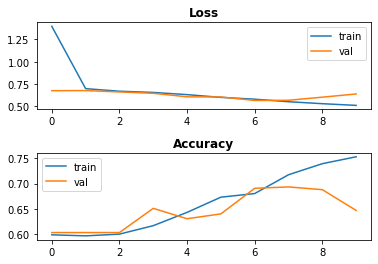



Confusion Matrix, without normalization


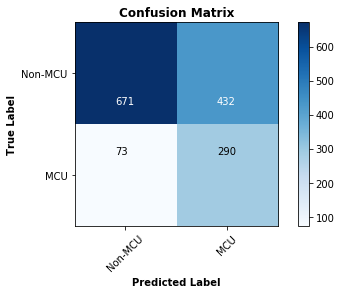



              precision    recall  f1-score   support

     Non-MCU       0.90      0.61      0.73      1103
         MCU       0.40      0.80      0.53       363

    accuracy                           0.66      1466
   macro avg       0.65      0.70      0.63      1466
weighted avg       0.78      0.66      0.68      1466



In [11]:
print(mf.evaluate_test(model_1, history_1, class_labels, train_images, test_images, train_y, test_y))

### 128 Model

In [20]:
model_1 = models.Sequential()
model_1.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model_1.add(layers.MaxPooling2D((2, 2)))

model_1.add(Dropout(.5))
model_1.add(layers.Flatten())
model_1.add(layers.Dense(256, activation='relu'))
model_1.add(Dropout(.5))
model_1.add(layers.Dense(1, activation='sigmoid'))

model_1.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [21]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_1 = model_1.fit(train_images,
                                                 train_y,
                                                 epochs=30,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                 callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/30
4172/4172 [==============================] - 38s 9ms/step - loss: 0.8997 - acc: 0.6237 - val_loss: 0.6439 - val_acc: 0.6324
Epoch 2/30
4172/4172 [==============================] - 36s 9ms/step - loss: 0.6810 - acc: 0.6302 - val_loss: 0.6562 - val_acc: 0.6324
Epoch 3/30
4172/4172 [==============================] - 34s 8ms/step - loss: 0.6621 - acc: 0.6326 - val_loss: 0.6358 - val_acc: 0.6324
Epoch 4/30
4172/4172 [==============================] - 32s 8ms/step - loss: 0.6480 - acc: 0.6299 - val_loss: 0.6440 - val_acc: 0.6324
Epoch 5/30
4172/4172 [==============================] - 33s 8ms/step - loss: 0.6413 - acc: 0.6426 - val_loss: 0.5987 - val_acc: 0.6699
Epoch 6/30
4172/4172 [==============================] - 35s 8ms/step - loss: 0.6093 - acc: 0.6735 - val_loss: 0.5850 - val_acc: 0.6756
Epoch 7/30
4172/4172 [==============================] - 36s 9ms/step - loss: 0.5674 - acc: 0.6920 - val_loss: 0.5524 - val_acc: 0.7169
Epoch 8

Accuracy 
 Train: 0.859, Test: 0.728
Loss 
 Train: 0.316, Test: 0.600 



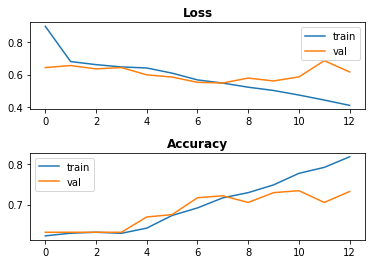



Confusion Matrix, without normalization


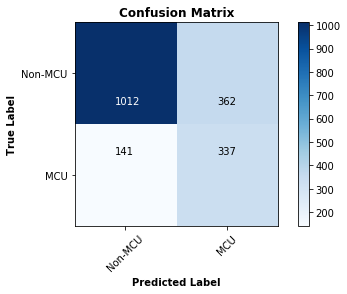



              precision    recall  f1-score   support

     Non-MCU       0.88      0.74      0.80      1374
         MCU       0.48      0.71      0.57       478

    accuracy                           0.73      1852
   macro avg       0.68      0.72      0.69      1852
weighted avg       0.78      0.73      0.74      1852



In [22]:
print(mf.evaluate_test(model_1, history_1, class_labels, train_images, test_images, train_y, test_y))

# 128 with 6x6

Is 6x6 bad because of focus? Bokeh'd characters shouldn't be identified

In [11]:
model_2 = models.Sequential()
model_2.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model_2.add(layers.MaxPooling2D((2, 2)))

model_2.add(Dropout(.5))
model_2.add(layers.Flatten())
model_2.add(layers.Dense(128, activation='relu'))
model_2.add(layers.Dense(1, activation='sigmoid'))

model_2.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [12]:
%%time
#early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_2 = model_2.fit(train_images,
                                                 train_y,
                                                 epochs=10,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y))
                                                #callbacks=early_stopping)

Train on 3170 samples, validate on 791 samples
Epoch 1/10
3170/3170 [==============================] - 12s 4ms/step - loss: 0.8275 - acc: 0.5773 - val_loss: 0.6573 - val_acc: 0.5980
Epoch 2/10
3170/3170 [==============================] - 11s 4ms/step - loss: 0.6705 - acc: 0.5946 - val_loss: 0.6604 - val_acc: 0.5980
Epoch 3/10
3170/3170 [==============================] - 11s 4ms/step - loss: 0.6566 - acc: 0.5975 - val_loss: 0.6442 - val_acc: 0.5980
Epoch 4/10
3170/3170 [==============================] - 11s 4ms/step - loss: 0.6482 - acc: 0.5924 - val_loss: 0.6371 - val_acc: 0.6245
Epoch 5/10
3170/3170 [==============================] - 11s 4ms/step - loss: 0.6314 - acc: 0.6132 - val_loss: 0.6321 - val_acc: 0.6688
Epoch 6/10
3170/3170 [==============================] - 11s 4ms/step - loss: 0.6177 - acc: 0.6726 - val_loss: 0.8200 - val_acc: 0.5082
Epoch 7/10
3170/3170 [==============================] - 11s 4ms/step - loss: 0.6005 - acc: 0.6789 - val_loss: 0.6672 - val_acc: 0.5891
Epoch 8/

Accuracy 
 Train: 0.773, Test: 0.717
Loss 
 Train: 0.469, Test: 0.512 



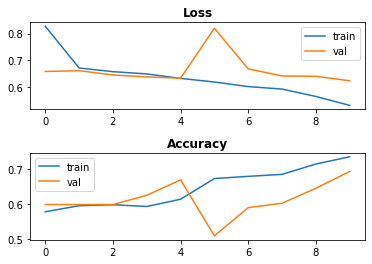



Confusion Matrix, without normalization


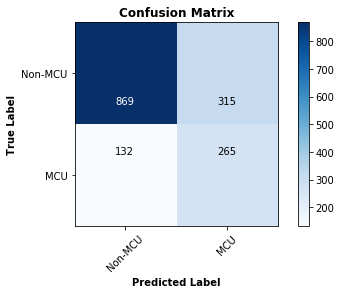



              precision    recall  f1-score   support

     Non-MCU       0.87      0.73      0.80      1184
         MCU       0.46      0.67      0.54       397

    accuracy                           0.72      1581
   macro avg       0.66      0.70      0.67      1581
weighted avg       0.76      0.72      0.73      1581



In [13]:
print(mf.evaluate_test(model_2, history_2, class_labels, train_images, test_images, train_y, test_y))

# 3, rmsprop with double dropout

In [9]:
model_3 = models.Sequential()
model_3.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model_3.add(layers.MaxPooling2D((2, 2)))

model_3.add(Dropout(.5))
model_3.add(layers.Flatten())
model_3.add(layers.Dense(256, activation='relu'))
model_3.add(Dropout(.5))
model_3.add(layers.Dense(1, activation='sigmoid'))

model_3.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [15]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_3 = model_3.fit(train_images,
                                                 train_y,
                                                 epochs=30,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/30
4172/4172 [==============================] - 19s 5ms/step - loss: 1.0202 - acc: 0.6244 - val_loss: 0.8685 - val_acc: 0.6324
Epoch 2/30
4172/4172 [==============================] - 15s 4ms/step - loss: 0.6735 - acc: 0.6314 - val_loss: 0.6153 - val_acc: 0.6324
Epoch 3/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.6620 - acc: 0.6326 - val_loss: 0.6516 - val_acc: 0.6324
Epoch 4/30
4172/4172 [==============================] - 15s 4ms/step - loss: 0.6401 - acc: 0.6328 - val_loss: 0.6447 - val_acc: 0.6324
Epoch 5/30
4172/4172 [==============================] - 15s 4ms/step - loss: 0.6462 - acc: 0.6326 - val_loss: 0.5939 - val_acc: 0.6324
Epoch 6/30
4172/4172 [==============================] - 15s 4ms/step - loss: 0.6277 - acc: 0.6275 - val_loss: 0.6370 - val_acc: 0.6344
Epoch 7/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.6240 - acc: 0.6335 - val_loss: 0.6038 - val_acc: 0.6324
Epoch 8

Accuracy 
 Train: 0.852, Test: 0.705
Loss 
 Train: 0.365, Test: 0.612 



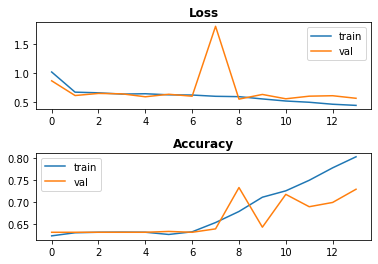



Confusion Matrix, without normalization


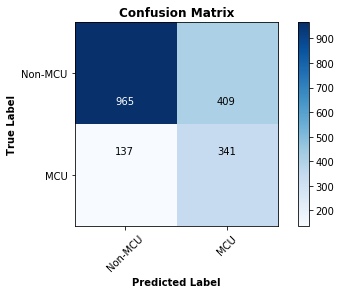



              precision    recall  f1-score   support

     Non-MCU       0.88      0.70      0.78      1374
         MCU       0.45      0.71      0.56       478

    accuracy                           0.71      1852
   macro avg       0.67      0.71      0.67      1852
weighted avg       0.77      0.71      0.72      1852



In [16]:
print(mf.evaluate_test(model_3, history_3, class_labels, train_images, test_images, train_y, test_y))

# 4, adam with double dropout

In [17]:
model_4 = models.Sequential()
model_4.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128, 1)))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(128, (6, 6), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(256, (5, 5), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(512, (4, 4), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(layers.Conv2D(1024, (3, 3), activation='relu'))
model_4.add(layers.MaxPooling2D((2, 2)))

model_4.add(Dropout(.5))
model_4.add(layers.Flatten())
model_4.add(layers.Dense(256, activation='relu'))
model_4.add(Dropout(.5))
model_4.add(layers.Dense(1, activation='sigmoid'))

model_4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [18]:
%%time
early_stopping = [EarlyStopping(monitor = 'val_loss', patience = 5)]
history_4 = model_4.fit(train_images,
                                                 train_y,
                                                 epochs=30,
                                                 batch_size=50,
                                                 validation_data=(val_images, val_y),
                                                callbacks=early_stopping)

Train on 4172 samples, validate on 1042 samples
Epoch 1/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.6526 - acc: 0.6294 - val_loss: 0.6273 - val_acc: 0.6324
Epoch 2/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.6424 - acc: 0.6292 - val_loss: 0.6350 - val_acc: 0.6324
Epoch 3/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.6294 - acc: 0.6326 - val_loss: 0.6120 - val_acc: 0.6324
Epoch 4/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.6170 - acc: 0.6419 - val_loss: 0.5662 - val_acc: 0.7044
Epoch 5/30
4172/4172 [==============================] - 15s 4ms/step - loss: 0.5871 - acc: 0.6692 - val_loss: 0.5566 - val_acc: 0.6862
Epoch 6/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.5455 - acc: 0.7198 - val_loss: 0.5249 - val_acc: 0.7476
Epoch 7/30
4172/4172 [==============================] - 16s 4ms/step - loss: 0.5112 - acc: 0.7414 - val_loss: 0.5484 - val_acc: 0.7495
Epoch 8

Accuracy 
 Train: 0.882, Test: 0.760
Loss 
 Train: 0.272, Test: 0.572 



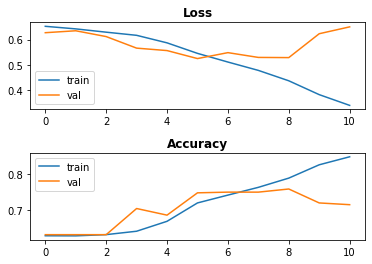



Confusion Matrix, without normalization


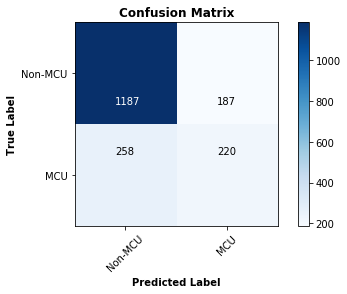



              precision    recall  f1-score   support

     Non-MCU       0.82      0.86      0.84      1374
         MCU       0.54      0.46      0.50       478

    accuracy                           0.76      1852
   macro avg       0.68      0.66      0.67      1852
weighted avg       0.75      0.76      0.75      1852



In [19]:
print(mf.evaluate_test(model_4, history_4, class_labels, train_images, test_images, train_y, test_y))